In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('data_for_further_analysis.csv')
df.head()

,annotator,sentence_number,text,annotator_label,model_entities
0,dr_s,1,And where's Mr. Campbell?,l,NaN
1,dr_s,2,Charlie asked.,l,NaN
2,dr_s,3,Gone to Switzerland.,l,NaN
3,dr_s,4,"Mr. Campbell's a pretty sick man, Mr. Wales.",l,NaN
4,dr_s,5,I'm sorry to hear that.,l,NaN


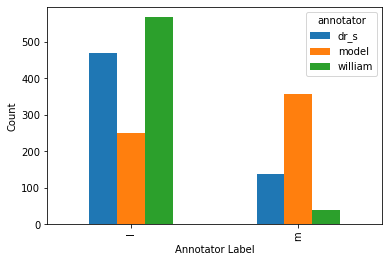

In [4]:
# group by 'annotator' and 'annotator_label' columns and count the occurrences of each label
grouped = df.groupby(['annotator', 'annotator_label']).size().reset_index(name='counts')

# pivot the data so that each annotator is a column
pivoted = grouped.pivot(index='annotator_label', columns='annotator', values='counts')

# create a bar plot
pivoted.plot.bar()

# add x and y labels
plt.xlabel('Annotator Label')
plt.xticks(rotation = 360)
plt.ylabel('Count')

# show plot
plt.show()


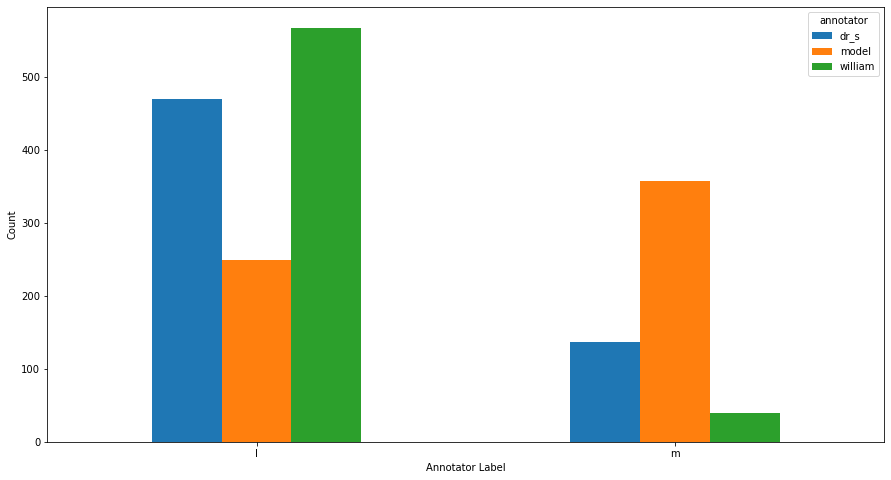

In [5]:
# group by 'annotator' and 'annotator_label' columns and count the occurrences of each label
grouped = df.groupby(['annotator', 'annotator_label']).size().reset_index(name='counts')

# pivot the data so that each annotator is a column
pivoted = grouped.pivot(index='annotator_label', columns='annotator', values='counts')

# create a bar plot
pivoted.plot.bar(figsize=(15,8))

# add x and y labels
plt.xlabel('Annotator Label')
plt.xticks(rotation = 360) 
plt.ylabel('Count')

# show plot
plt.show()

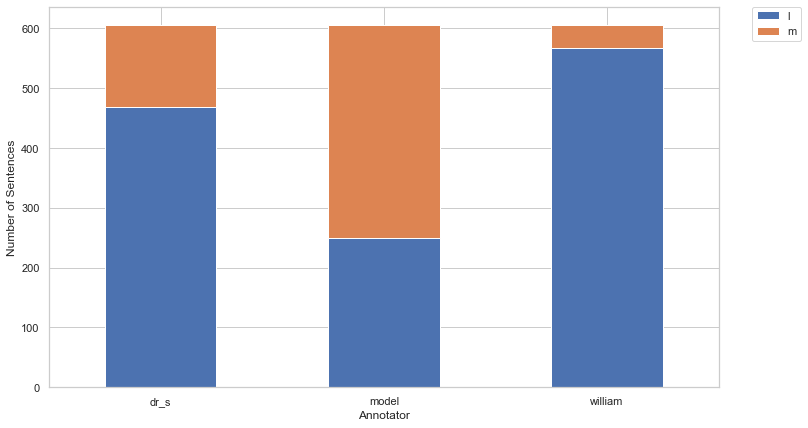

In [6]:
# pivot the dataframe to get a frequency count of the labels
annotator_labels = df.pivot_table(index='annotator', columns='annotator_label', values='sentence_number', aggfunc='count')
annotator_labels = annotator_labels.fillna(0)

# plot the stacked bar plot
sns.set(style="whitegrid")
sns.set_color_codes("muted")
ax = annotator_labels.plot(kind='bar', stacked=True, figsize=(12, 7))

# add labels and legends
ax.set_xlabel("Annotator")
ax.set_ylabel("Number of Sentences")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation = 360) 

# show the plot
plt.show()


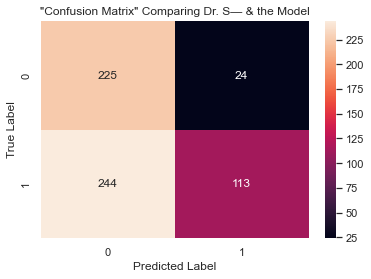

In [9]:
# Subset the data to only include the annotators and labels you're interested in
df_subset = df[(df['annotator'] == 'model') | (df['annotator'] == 'dr_s')]

# Create the confusion matrix
conf_mat = confusion_matrix(df_subset[df_subset['annotator'] == 'model']['annotator_label'], 
                            df_subset[df_subset['annotator'] == 'dr_s']['annotator_label'])

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(conf_mat, annot=True, fmt='d')

# Add labels and title to the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('"Confusion Matrix" Comparing Dr. S— & the Model')

# Show the plot
plt.show()

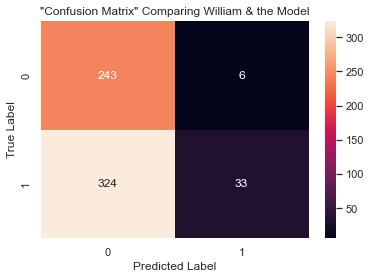

In [10]:
# Subset the data to only include the annotators and labels you're interested in
df_subset = df[(df['annotator'] == 'model') | (df['annotator'] == 'william')]

# Create the confusion matrix
conf_mat = confusion_matrix(df_subset[df_subset['annotator'] == 'model']['annotator_label'], 
                            df_subset[df_subset['annotator'] == 'william']['annotator_label'])

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(conf_mat, annot=True, fmt='d')

# Add labels and title to the plot
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('"Confusion Matrix" Comparing William & the Model')

# Show the plot
plt.show()

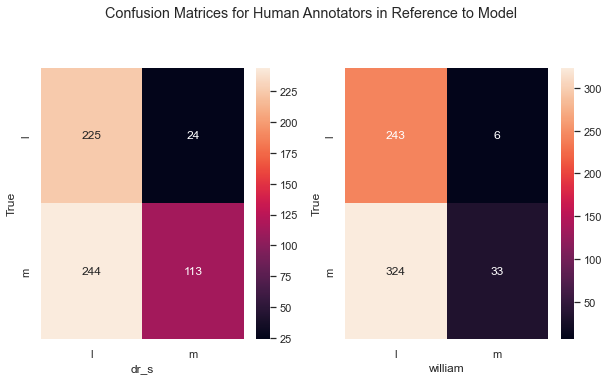

In [8]:
# Now let's just plot 'em both on the same graph with matplotlib's subplot functionality ...:
annotators = ['dr_s', 'william']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, annotator in enumerate(annotators):
    labels = df.loc[df['annotator'] == annotator]['annotator_label'].tolist()
    true_labels = df.loc[df['annotator'] == 'model']['annotator_label'].tolist()
    conf_matrix = pd.crosstab(pd.Series(true_labels, name='True'), pd.Series(labels, name=annotator))
    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax[i])

fig.suptitle("Confusion Matrices for Human Annotators in Reference to Model", y=1.05)
plt.show()

In [ ]:
# seaborn's heatmap makes plotting this kind of thing so easy—for a fuller version that doesn't utilize seaborn at all, one can try: 

def plot_confusion_matrix(conf_mat, labels):
    fig, ax = plt.subplots()
    cax = ax.matshow(conf_mat)
    plt.title("Confusion Matrix")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()